In [1]:
import pandas as pd
from pandas import Series,DataFrame

In [2]:
titanic_df=pd.read_csv('train.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

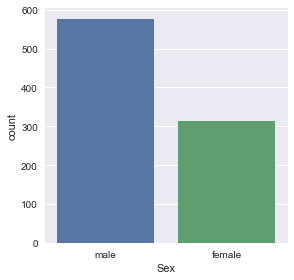

In [9]:
sns.factorplot('Sex',data=titanic_df,kind='count')

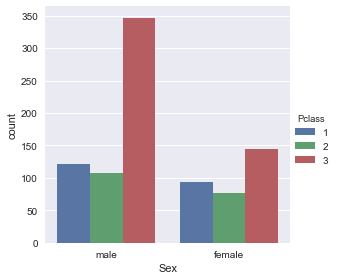

In [10]:
sns.factorplot('Sex',data=titanic_df,hue='Pclass',kind='count')

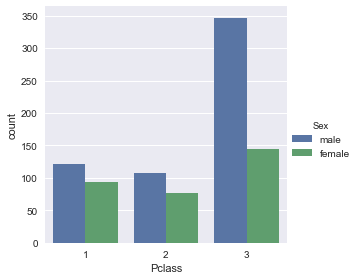

In [11]:
sns.factorplot('Pclass',data=titanic_df,hue='Sex',kind='count')

In [12]:
def male_female_child(passenger):
    age,sex = passenger
    if age<16:
        return 'child'
    else:
        return sex

In [14]:
titanic_df['person']=titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [15]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


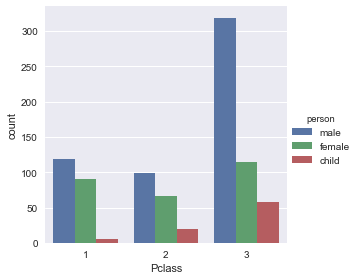

In [20]:
sns.factorplot('Pclass',data=titanic_df,hue='person',kind='count')

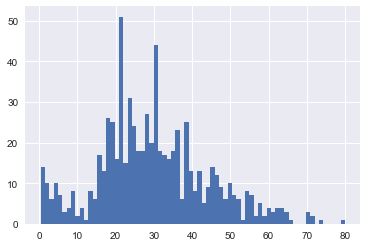

In [21]:
titanic_df['Age'].hist(bins=70)

In [22]:
titanic_df['Age'].mean()

29.69911764705882

In [23]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

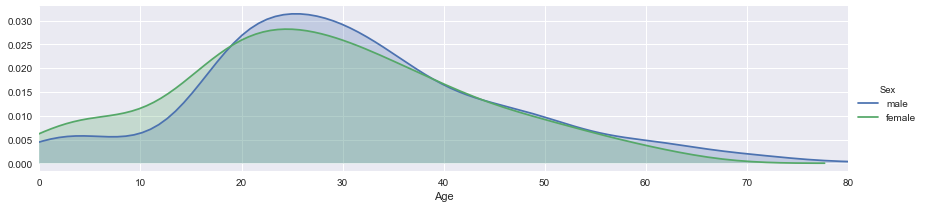

In [25]:
fig=sns.FacetGrid(titanic_df,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest =titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

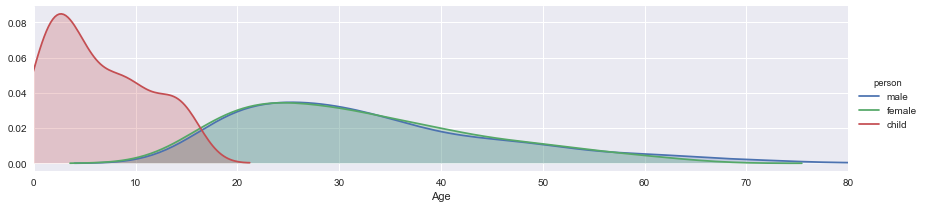

In [26]:
fig=sns.FacetGrid(titanic_df,hue='person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest =titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

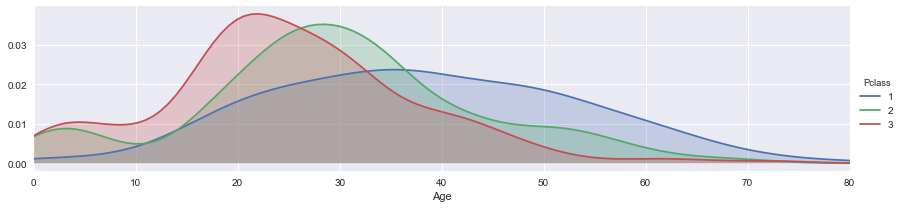

In [27]:
fig=sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest =titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [28]:
deck=titanic_df['Cabin'].dropna()

In [29]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

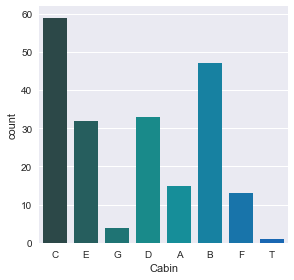

In [31]:
levels=[]
for level in deck:
    levels.append(level[0])
cabin_df=DataFrame(levels)
cabin_df.columns=['Cabin']
sns.factorplot(x='Cabin',data=cabin_df,palette='winter_d',kind='count')
    

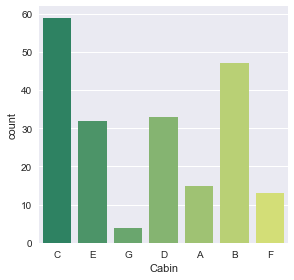

In [32]:
cabin_df=cabin_df[cabin_df.Cabin != 'T']
sns.factorplot(x='Cabin',data=cabin_df,palette='summer',kind='count')

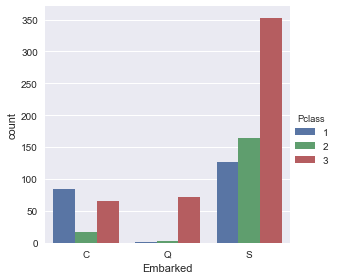

In [34]:
sns.factorplot(x='Embarked',data=titanic_df,kind='count',hue='Pclass',order=['C','Q','S'])

In [35]:
titanic_df['Alone']= titanic_df.SibSp + titanic_df.Parch

In [36]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0


In [37]:
titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'With Family'

titanic_df['Alone'].loc[titanic_df['Alone']==0] ='Alone'

/Users/eshankoul/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [38]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


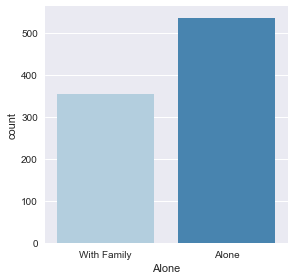

In [39]:
sns.factorplot(x='Alone',data=titanic_df,palette='Blues',kind='count')

In [40]:
titanic_df['Survivor']=titanic_df.Survived.map({0:'no',1:'yes'})

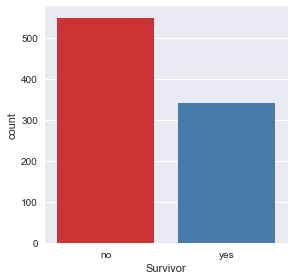

In [42]:
sns.factorplot(x='Survivor',data=titanic_df,palette='Set1',kind='count')

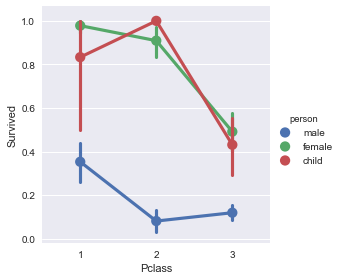

In [44]:
sns.factorplot('Pclass','Survived',hue='person',data=titanic_df)

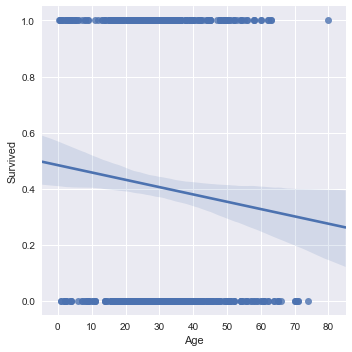

In [46]:
sns.lmplot('Age','Survived',data=titanic_df)

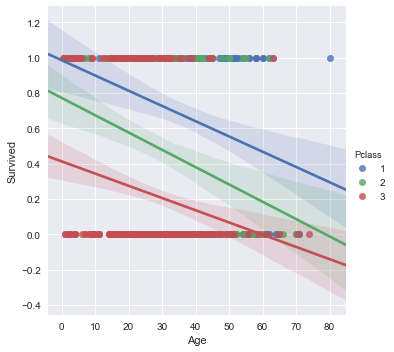

In [47]:
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df)

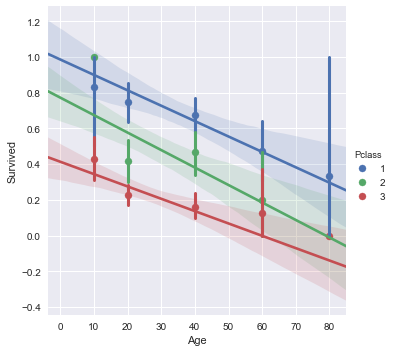

In [48]:
generations=[10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,x_bins=generations)

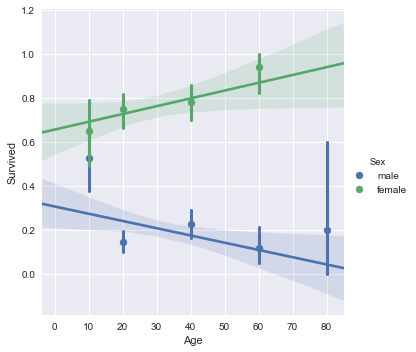

In [49]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,x_bins=generations)

In [51]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


In [57]:
titanic_df['CabinLevel']=titanic_df['Cabin'].str[0]


In [58]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,CabinLevel
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no,NaN


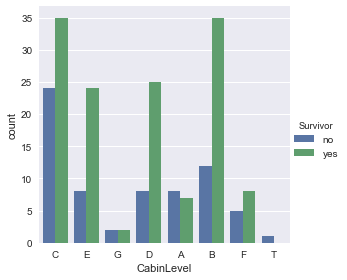

In [62]:
sns.factorplot('CabinLevel',hue='Survivor',data=titanic_df,kind='count')

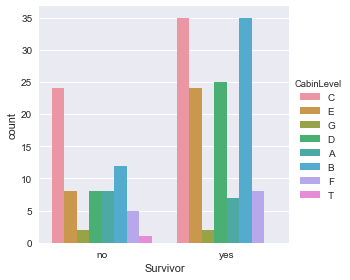

In [67]:
sns.factorplot('Survivor',hue='CabinLevel',data=titanic_df,kind='count')

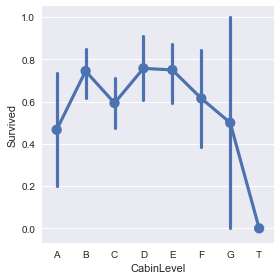

In [69]:
sns.factorplot('CabinLevel','Survived',data=titanic_df,x_order=['A','B','C','D','E','F','G','T'])

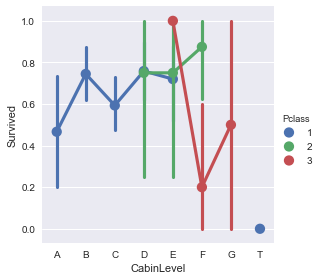

In [70]:
sns.factorplot('CabinLevel','Survived',hue='Pclass',data=titanic_df,x_order=['A','B','C','D','E','F','G','T'])

In [73]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,CabinLevel
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no,NaN


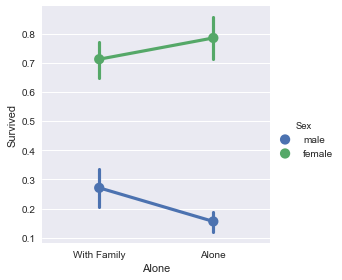

In [76]:
sns.factorplot('Alone','Survived',hue='Sex',data=titanic_df)